# Tier-based Strictly $k$-Local (TSL$_k$) languages

Goals:

- Understand the basics of the TSL learning algorithm
- Translate real-world data into formal language terms
- Implement the python version of algorithm on this data

Submit this notebook to Canvas by Thursday! 

## The TSL class

A TSL grammar $G$ consists of a tuple such that $G = \langle S, T \rangle$ where $S$ is a set of allowed substrings ($k$-factors over $\Sigma \cup \{\#\}$) and $T$ is a subset of $\Sigma$. A word is part of the language described by $G$ iff, when ignoring the segments of the word not in $T$, all $k$-factors remaining are present in $S$. 



### Example

1. Assume $\Sigma = \{t, d, a\}$
1. Assume $G = \langle S, T \rangle$ where:
    1. $S = \{tt, dd, \#t, \#d, t\#, d\#, \#\#\}$
    2. $T = \{t, d\}$
    
We can define a function $P$ that "projects" the segments in some tier $T$ to a new string:

$$P_T(tatdata) = ttdt$$

The output of this function is checked for strict locality like any $SL$ language against $S$. 

Potential words of the language described by $G$:
    
| potential word | tier projection | $k$-factors on tier | grammatical? |
| --- | --- | --- | --- |
| tata | tt | #t, tt, t# | yes |
| tada | td | #t, td, d# | no, \*td |
| aaa | $\lambda$ | ## | yes |
| adta | dt | #d, dt, t# | no, \*dt |

## TSL learning algorithm

### Definitions

* **path**: a path is a triple $\langle \sigma_1, X, \sigma_2 \rangle$ where $\sigma_1$ and $\sigma_2$ are two positions in the string in a precedence relation, and $X$ is the set of segments that intervenes between them.
    * $\sigma_1, \sigma_2 \in \Sigma \cup \{\#\}$
    * $X \subseteq \Sigma$
    
What are the paths on $tada$?

| distance | precedence pair | interveners | and the full path is:                      |
|----------|-----------------|-------------|-----------------------------|
| 1        | ta              | $\{\}$      | $\langle t,\{\},a\rangle$   |
|          | ad              | $\{\}$      | $\langle a,\{\},d\rangle$   |
|          | da              | $\{\}$      | $\langle d,\{\},a\rangle$   |
| 2        | td              | $\{a\}$     | $\langle t,\{a\},d\rangle$  |
|          | aa              | $\{d\}$     | $\langle a,\{d\},a\rangle$  |
| 3        | ta              | $\{ad\}$    | $\langle t,\{ad\},a\rangle$ |

### Algorithm

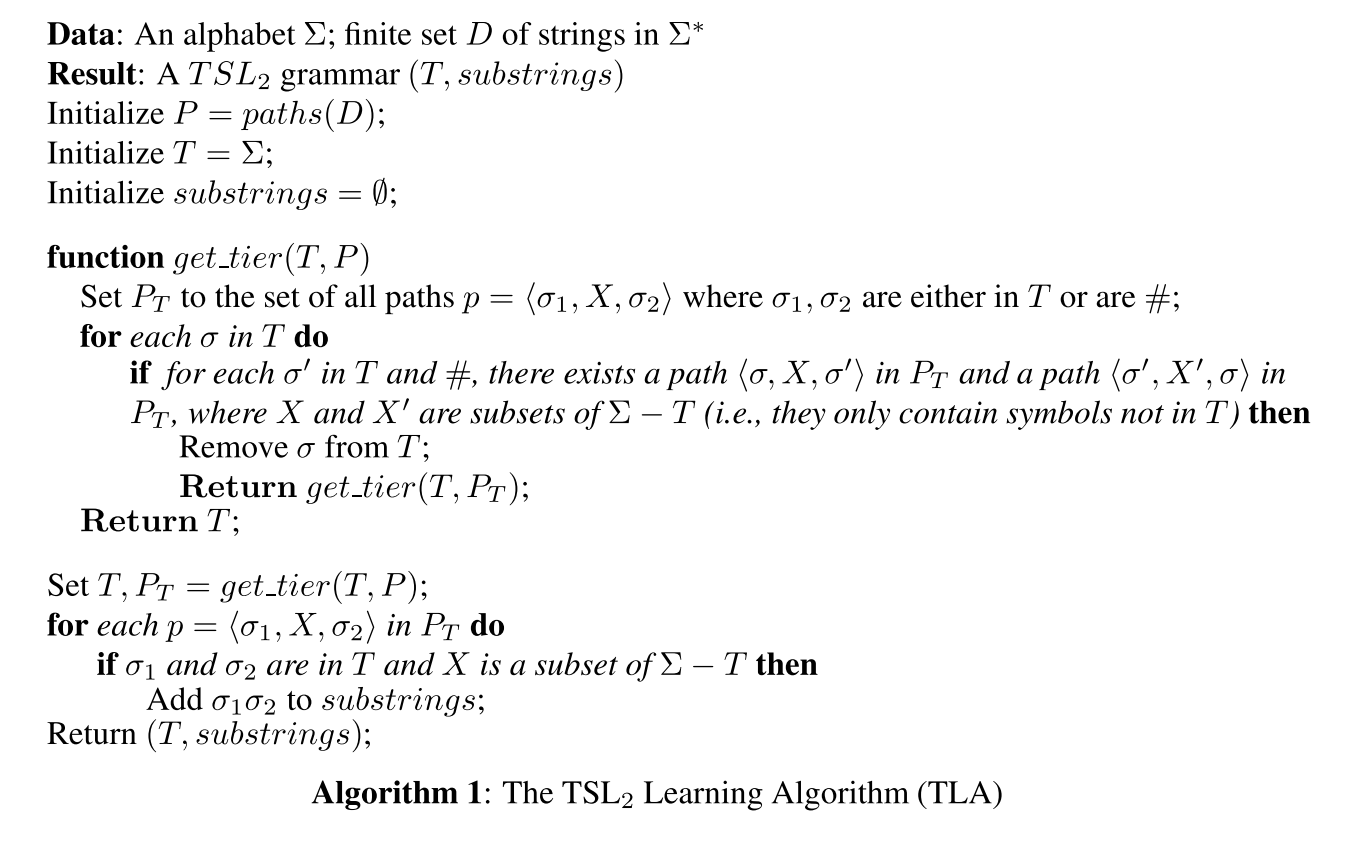

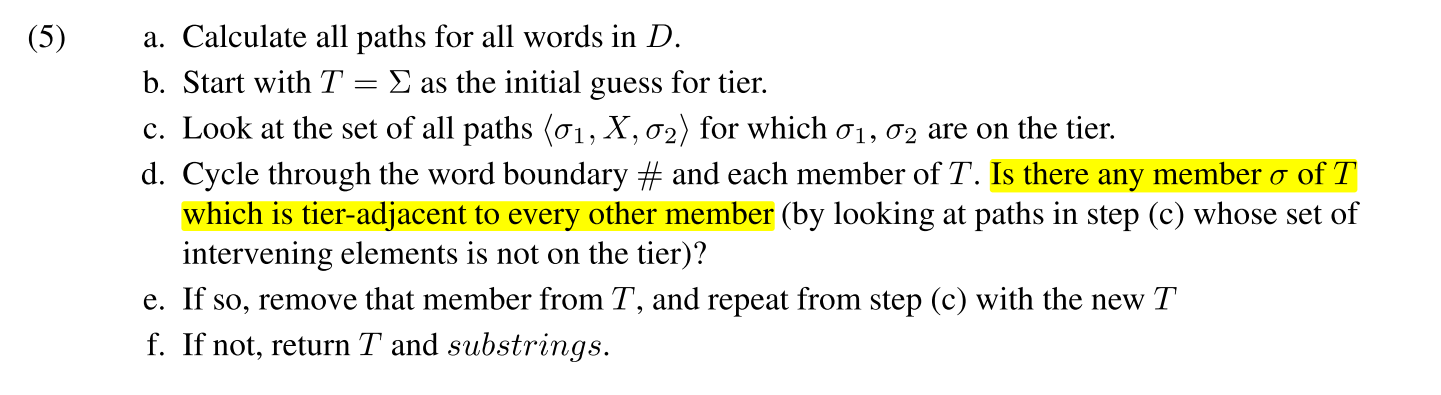

At each step, the algorithm looks at the path where the interveners are not part of the current tier hypothesis. If a segment can freely occur among these paths, then the current tier is not policing that segment in any way, so that segment is removed from the current tier hypothesis. This repeats until nothing more can be removed.

## Python implementation with SigmaPie

We will use the [SigmaPie](https://github.com/alenaks/SigmaPie) implementation of the (T)SL learning algorithms.

Running the cell below should install it on most systems, if you have not done so already.


In [1]:
## Only run this cell if you have not yet installed the sigmapie package!

!pip install sigmapie

In [2]:
import sigmapie


You successfully loaded SigmaPie. 

Formal language classes and grammars available:
	* strictly piecewise: SP(alphabet, grammar, k, data, polar);
	* strictly local: SL(alphabet, grammar, k, data, edges, polar);
	* tier-based strictly local: TSL(alphabet, grammar, k, data, edges, polar, tier);
	* multiple tier-based strictly local: MTSL(alphabet, grammar, k, data, edges, polar).

Alternatively, you can initialize a transducer: FST(states, sigma, gamma, initial, transitions, stout).
Learning algorithm:
	OSTIA: ostia(sample, sigma, gamma).


## Test: the EndB language

In [3]:
# initialize an SL grammar with positive polarity

test_language = sigmapie.SL(polar="p")
test_language.k = 2

In [4]:
# Invent some test data; must eventually be a list for SigmaPie

test_data_raw = "aaab babbbab abab aaab bbbb b ab aab bbb bababbaab abbaaab"
test_language.data = test_data_raw.split() + ['']

In [5]:
# Extract and print the alphabet (Sigma)

test_language.extract_alphabet()
print(test_language.alphabet)

['a', 'b']


In [6]:
# Print the leanred grammar
# NB that we have positive polarity (allowed substrings)

test_language.learn()
print("polarity:",test_language.check_polarity())
print(test_language.grammar)

polarity: p
[('b', 'a'), ('>', 'b'), ('b', '<'), ('a', 'b'), ('b', 'b'), ('>', 'a'), ('a', 'a'), ('>', '<')]


In [7]:
# switch polarity and print grammar again

test_language.switch_polarity()
print("polarity:",test_language.check_polarity())
print(test_language.grammar)

polarity: n
[('a', '<')]


In [8]:
test_language.generate_sample(5, repeat = False)

['', 'aaaabbbb', 'baaabaaaaab', 'b', 'aaabaab']

## TSL languages

Code below directly from https://github.com/alenaks/SigmaPie

### Latin

In [9]:
latin = sigmapie.TSL()
latin.data = ["ccc", "lccrcccclcr", "lrl", "rcclc"]

Think: how does the simplification of all non-{l,r}s to 'c' simplify the requirements on what can be removed from the tier alphabet during learning?

In [10]:
latin.extract_alphabet()
print("Alphabet:", latin.alphabet)

Alphabet: ['c', 'l', 'r']


In [11]:
latin.learn()
print('Tier:   ', latin.tier)
print('Grammar:', latin.grammar)

Tier:    ['l', 'r']
Grammar: [('l', '<'), ('r', 'l'), ('>', 'r'), ('l', 'r'), ('>', '<'), ('>', 'l'), ('r', '<')]


In our definitions above, `latin.tier` is $T$ and `latin.grammar` is $S$

In [12]:
print("Initial polarity of the grammar:", latin.check_polarity(), "\n")
latin.switch_polarity()
print("New polarity of the grammar:", latin.check_polarity())
print("New grammar:", latin.grammar)

Initial polarity of the grammar: p 

New polarity of the grammar: n
New grammar: [('l', 'l'), ('r', 'r')]


### OneB

In [13]:
stress = sigmapie.TSL(polar="n")
stress.data = ["aaabaaaa", "baaaa", "aaaaaba", "aaaaaab"]
stress.extract_alphabet()
stress.learn()

print("Tier:    ", stress.tier)
print("Grammar: ", stress.grammar)

Tier:     ['b']
Grammar:  [('b', 'b'), ('>', '<')]


Think: can there be a TSL account for Buriat?

## Nawuri roundness harmony with blocking

The actual pattern described in Casali 1995 is actually **local**: it takes place in VCV contexts (vowel interaction across a consonant). Despite this, we will attempt to describe two languages:

1. Bounded Nawuri: interaction in VCV contexts
2. Unbounded Nawuri: unbounded interaction of two vowels with a potentially unbounded number of interveners

We will ignore the [ATR] harmony and focus only on the [round] harmony.

### The pattern

Nawuri has the following vowel system:

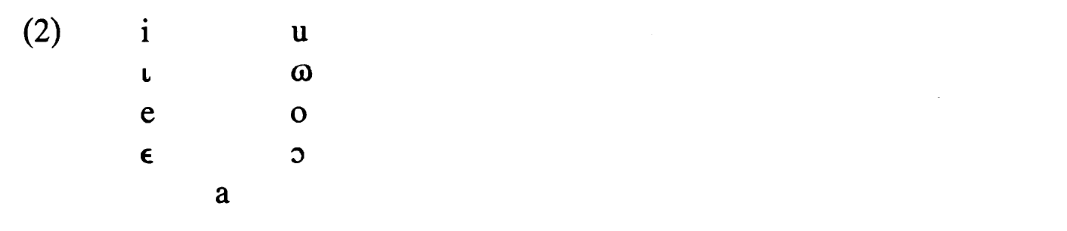

The nearest stem vowel, if rounded, causes the prefix vowel to become rounded. 

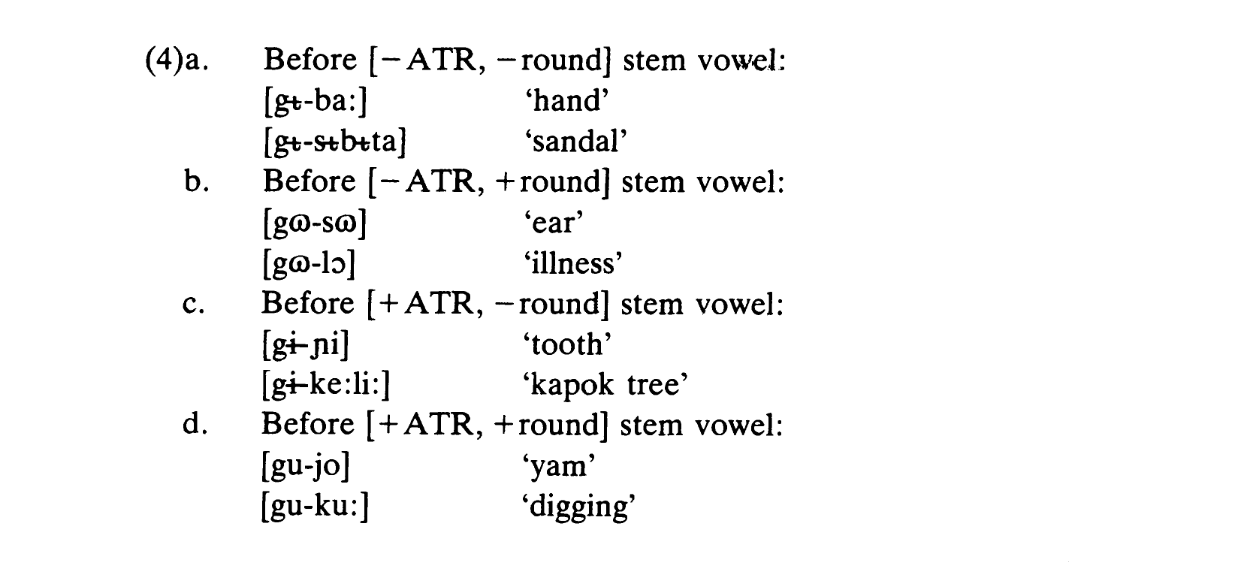

Additionally, the following consonant, if itself is rounded, causes the prefix vowel to become rounded, regardless of the following vowel's roundedness.

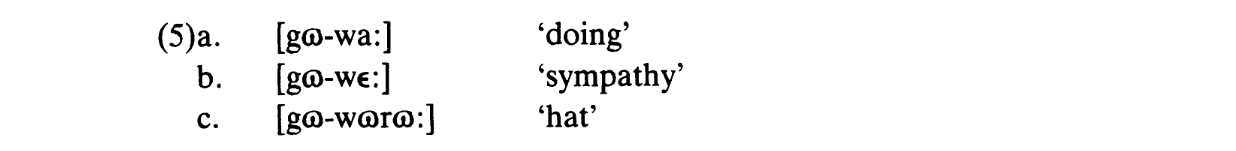

However, rounding does **not** occur if the intervening consonant is an **unrounded but labial** consonant.

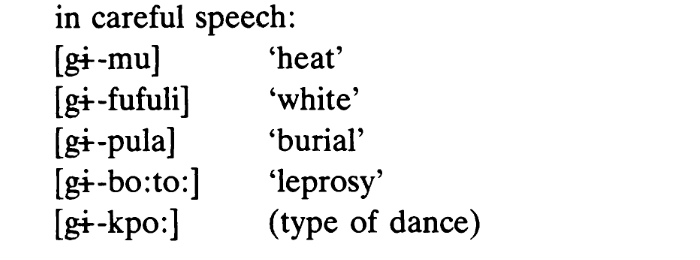

(Be sure to treat [kp] as a single segment.)

### Your task

1. Extend the generalization to be *unbounded*, so that it can harmony can happen over an unbounded length.
1. Choose symbols for your $\Sigma$ such that each element represents a relevant natural class for the pattern at hand. Again, focus on the rounding harmony, so you can abstract away from ATR distinctions. 
2. With this alphabet, make some representative data to feed into the TSL learning algorithm of SigmaPie.
3. Train a grammar with this data and inspect the results. Modify the data if the resulting grammar does not match the target generalization.
4. In a few sentences, explain your results. Does it capture the data exactly? How can you interpret the restrictions on the tier? etc.


In [15]:
# your code here

unrV = 'v'
rouV = 'V'
rouC = 'C'
unrlabC = 'l'
unrnonlabC= 'c'

nawuri = sigmapie.TSL()

nawuri.data = [
#   a
    unrnonlabC + unrV + unrlabC + unrV, #cvlv
    unrnonlabC + unrV + unrnonlabC + unrV + unrlabC + unrV, #cvcvlc
#   b
    unrnonlabC + rouV + unrnonlabC + rouV, #cVcV
#   c
    unrnonlabC + unrV + unrnonlabC + unrV, #cvcv
    unrnonlabC + unrV + unrnonlabC + unrV + unrnonlabC + unrV, #cvcvcv
#   d
    unrnonlabC + rouV + unrnonlabC + rouV, #cVcV
#   5
    unrnonlabC + rouV + rouC + unrV, #cVCv
    unrnonlabC + rouV + rouC + rouV + unrnonlabC + rouC, #cVCVcC
#   last part
    unrnonlabC + unrV + unrlabC + rouV, #cvlV
    unrnonlabC + unrV + unrlabC + rouV + unrlabC + rouV + unrnonlabC + unrV, #cvlVlVcv - is this correct?
    unrnonlabC + unrV + unrlabC + rouV + unrnonlabC + unrV, #cvlVcv - is this allowed?
    unrnonlabC + unrV + unrlabC + rouV + unrnonlabC + rouV, #cvlVcV
#extra data
    unrnonlabC + unrV + unrlabC + unrnonlabC + rouV, #cvlcV
    unrnonlabC + unrV + unrlabC + rouV + unrnonlabC + rouV, #cvlVcV
    unrnonlabC + rouV + rouC + unrnonlabC, #cVCc
    unrnonlabC + unrnonlabC,
    unrnonlabC + unrlabC,
    unrnonlabC + unrnonlabC + unrnonlabC,
    rouC + rouV
]
nawuri.extract_alphabet()
nawuri.learn()

print("Tier:    ", nawuri.tier)
print("Grammar: ", nawuri.grammar)


nawuri.generate_sample(5, repeat = False)

#cv (check), cc (extra data), cl (check), cV (check), cC (check), c< (extra data), >c (check), vc (check), lc (extra data), Vc (check), Cc (extra data) there should be 11 possible combinations


Tier:     ['C', 'V', 'c', 'l', 'v']
Grammar:  [('c', 'l'), ('l', 'c'), ('c', 'c'), ('C', 'c'), ('l', 'v'), ('V', 'C'), ('C', 'v'), ('l', '<'), ('c', '<'), ('v', '<'), ('c', 'C'), ('>', 'C'), ('V', 'l'), ('v', 'l'), ('>', 'c'), ('c', 'v'), ('C', '<'), ('V', '<'), ('v', 'c'), ('V', 'c'), ('l', 'V'), ('c', 'V'), ('C', 'V')]


['C', 'c', 'cVcCvlVclclVCcCVlvlVCc', 'ccvlVlccv', 'cl']

After learning the pattern of Nawuri, we can see that the unrounded non-labial consonant is not a blocker and therefore should not be included in Tier set. There should be 11 combinations (every possible combo) of the unrounded non-labial consonant so as to deem in non-interventionary with other phonological processes. I could not get it to work here, but tier should not include 'c' - additionally when setting polarity to negative, 'c' doesn't show up.